In [1]:
import pandas as pd
data = pd.read_excel("DB.xlsm")
data['Precip_Type'].value_counts()
data.isnull().sum()

Formatted_Date              0
Summary                     0
Precip_Type               517
Temperature (C)             0
Apparent_Temperature_C      0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [2]:
mode_precip = data['Precip_Type'].mode()[0]
data['Precip_Type'] = data['Precip_Type'].fillna(mode_precip)

In [ ]:
# Month - Wise 
data['Formatted_Date'] = pd.to_datetime(data['Formatted_Date'], utc=True)
data['Month'] = data['Formatted_Date'].dt.month

In [ ]:
numeric_data = data.select_dtypes(include=['number'])
corr = numeric_data.corr()
print(corr['Temperature (C)'])

Temperature (C)           1.000000
Apparent_Temperature_C    0.992629
Humidity                 -0.632255
Wind Speed (km/h)         0.008957
Wind Bearing (degrees)    0.029988
Visibility (km)           0.392847
Loud Cover                     NaN
Pressure (millibars)     -0.005447
Month                     0.148576
Name: Temperature (C), dtype: float64


In [5]:
#Features 
X_numeric = data[['Humidity', 'Visibility (km)', 'Month']]
y = data['Temperature (C)']

X_categorical = pd.get_dummies(data['Precip_Type'], drop_first=True)
X = pd.concat([X_numeric, X_categorical], axis=1)
X.head()

,Humidity,Visibility (km),Month,snow
0,0.89,15.8263,3,False
1,0.86,15.8263,3,False
2,0.89,14.9569,4,False
3,0.83,15.8263,4,False
4,0.83,15.8263,4,False


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#COLUMN tranfomer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = ['Humidity', 'Visibility (km)', 'Month']
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

X_test_scaled

array([[-1.04788196,  1.24009814,  0.72226746,  0.        ],
       [ 0.48769681, -0.08983491,  1.30277475,  0.        ],
       [-0.43365045, -0.17439713,  1.30277475,  0.        ],
       ...,
       [-1.04788196, -0.08983491, -0.72900075,  0.        ],
       [-0.996696  ,  0.24841395,  0.14176018,  0.        ],
       [-0.74076621,  0.01010225,  0.72226746,  0.        ]])

In [8]:
dim = X_train.shape[0]  
num_train = X_train.shape[1]  
print(dim, num_train)

num_train = X_train.shape[0] 
dim = X_train.shape[1]       
num_test = X_test.shape[0]   
print(dim, num_train)

77162 4
4 77162


In [10]:
import numpy as np
X_train = X_train.astype(np.float64)
X_test  = X_test.astype(np.float64)
y_train = y_train.astype(np.float64)
y_test  = y_test.astype(np.float64)

Epoch 0 | Train Loss: 116.8340 | Test Loss: 72.5677
Epoch 50 | Train Loss: 35.9535 | Test Loss: 36.3201
Epoch 100 | Train Loss: 34.9225 | Test Loss: 35.2609
Epoch 150 | Train Loss: 34.0280 | Test Loss: 34.3409
Epoch 200 | Train Loss: 33.2466 | Test Loss: 33.5363
Epoch 250 | Train Loss: 32.5590 | Test Loss: 32.8279
Epoch 300 | Train Loss: 31.9497 | Test Loss: 32.1998
Epoch 350 | Train Loss: 31.4058 | Test Loss: 31.6389
Epoch 400 | Train Loss: 30.9169 | Test Loss: 31.1346
Epoch 450 | Train Loss: 30.4742 | Test Loss: 30.6780
Epoch 500 | Train Loss: 30.0708 | Test Loss: 30.2620
Epoch 550 | Train Loss: 29.7006 | Test Loss: 29.8805
Epoch 600 | Train Loss: 29.3591 | Test Loss: 29.5286
Epoch 650 | Train Loss: 29.0420 | Test Loss: 29.2022
Epoch 700 | Train Loss: 28.7462 | Test Loss: 28.8979
Epoch 750 | Train Loss: 28.4689 | Test Loss: 28.6129
Epoch 800 | Train Loss: 28.2077 | Test Loss: 28.3447
Epoch 850 | Train Loss: 27.9608 | Test Loss: 28.0915
Epoch 900 | Train Loss: 27.7265 | Test Loss: 27.

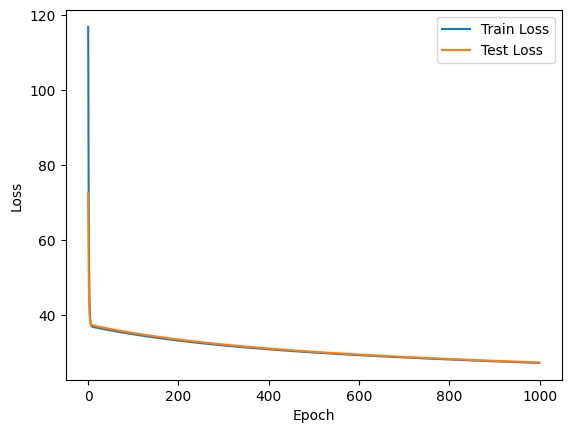

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Predict: y_hat = forward(X)
# Compute Gradients: backward(X, y_hat, y_true)
# Update Parameters: optimize()

class LinearRegression:
    def __init__(self, n_features, lr=0.01):
        self.w = np.zeros(n_features) 
        self.b = 0.0                  
        self.lr = lr

    def forward(self, X):
        return np.dot(X, self.w) + self.b

    def backward(self, X, y_hat, y):
        n = X.shape[0]
        # Gradients
        dw = -1/n * np.dot(X.T, (y - y_hat))
        db = -1/n * np.sum(y - y_hat)
        self.dw = dw
        self.db = db

    def optimize(self):
        self.w -= self.lr * self.dw
        self.b -= self.lr * self.db

num_epochs = 1000
train_loss_history = []
test_loss_history = []

# Initialize model
n_features = X_train.shape[1]
model = LinearRegression(n_features=n_features, lr=0.01)

for epoch in range(num_epochs):
    # Forward pass
    y_hat_train = model.forward(X_train)
    train_loss = np.mean((y_train - y_hat_train) ** 2) / 2

    # Backward pass
    model.backward(X_train, y_hat_train, y_train)
    model.optimize()

    # Test loss
    y_hat_test = model.forward(X_test)
    test_loss = np.mean((y_test - y_hat_test) ** 2) / 2

    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)

    if epoch % 50 == 0:
        print(f"Epoch {epoch} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

plt.plot(range(num_epochs), train_loss_history, label='Train Loss')
plt.plot(range(num_epochs), test_loss_history, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [12]:
import numpy as np
def regression_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
    return mse, mae, r2
train_mse, train_mae, train_r2 = regression_metrics(y_train, model.forward(X_train))
test_mse, test_mae, test_r2 = regression_metrics(y_test, model.forward(X_test))
print(f"Train MSE: {train_mse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
print(f"Test  MSE: {test_mse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

Train MSE: 54.5813, MAE: 5.9546, R²: 0.4002
Test  MSE: 54.8198, MAE: 5.9692, R²: 0.4052


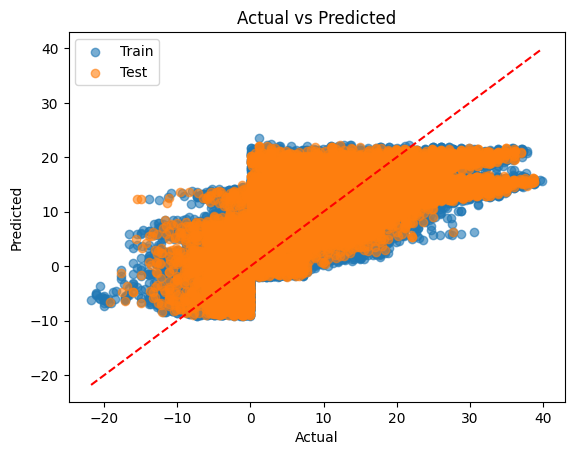

In [13]:
import matplotlib.pyplot as plt

y_train_pred = model.forward(X_train)
y_test_pred = model.forward(X_test)

plt.scatter(y_train, y_train_pred, label="Train", alpha=0.6)
plt.scatter(y_test, y_test_pred, label="Test", alpha=0.6)
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         'r--') 
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Actual vs Predicted")
plt.show()
